# 3. Time Series

Time series are possibly the simplest matplotlib visualizations. Although time series are expressive and intuitive visualizations to follow, extracting meaning from them requires interpretation. Multiplex's time series make it easier to highlight the story you want to convey through the plot.

At its most basic, Multiplex's time series performs the exact same function as matplotlib's `plot`: the `TimeSeries` class passes on all arguments and keyword arguments to the `plot` function.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

AttributeError: 'Line2D' object has no property 'fontweight'

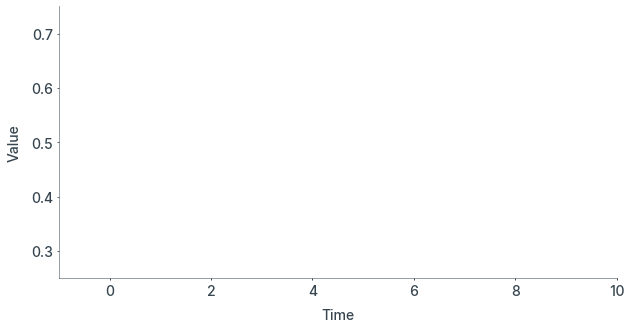

In [14]:
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire.style"))

viz = drawable.Drawable(plt.figure(figsize=(10, 5)))

viz.set_xlim(-1, 10)
viz.set_ylim(0.25, 0.75)
viz.set_xlabel('Time')
viz.set_ylabel('Value')

line = np.linspace(0.4, 0.5, num=10) + np.random.normal(0, 0.03, 10)
viz.draw_time_series(range(10), line, label='A', fontweight='bold')

viz.set_title('Time series', loc='left')
viz.set_caption('A simple time series.')
plt.show()